In [1]:
from DataGeneration import *

Graph 140737025811664

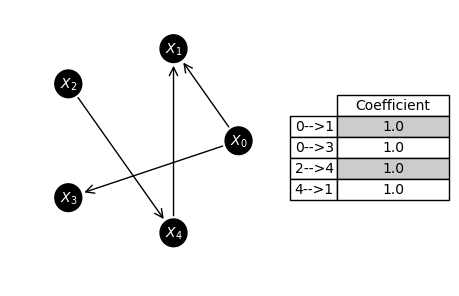

In [2]:
G = Graph(5)
G

Graph 140737025811664

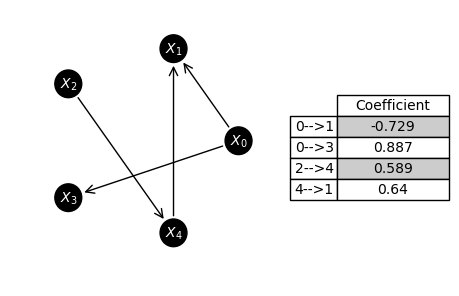

In [3]:
G.gen_coefficients()

Data 140735733248592

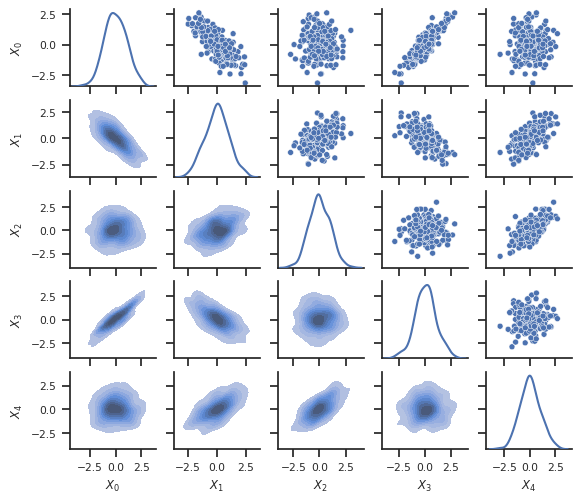

In [5]:
G.gen_data(200) #visualization can be a bit slow

In [6]:
G.sortability('R2')

0.8

In [7]:
G.gen_data(200); #no plotting: faster

In [8]:
D = Graph.gen_dataset(10, 500, 50)
D

100% completed


<List of 50 Graphs>

Graph 140735547059216

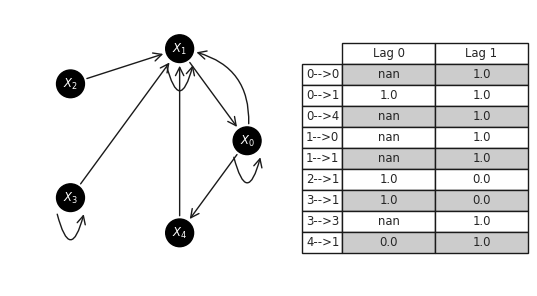

In [16]:
G = tsGraph(5, 1)
G

Graph 140735547059216

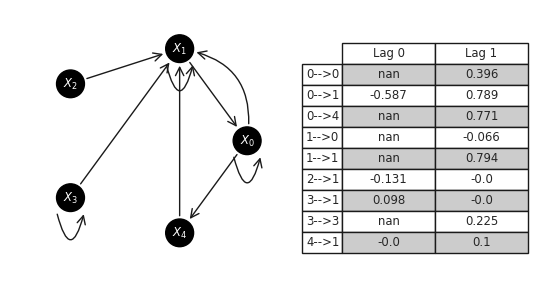

In [17]:
G.gen_coefficients()

TimeSeries 140735545777744

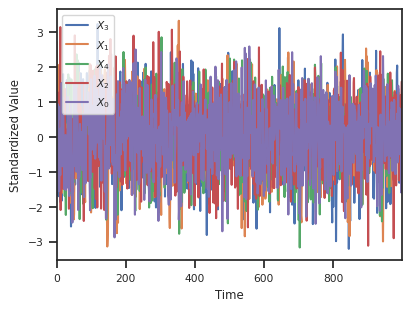

In [18]:
G.gen_data(1000)

Graph 140735549954128

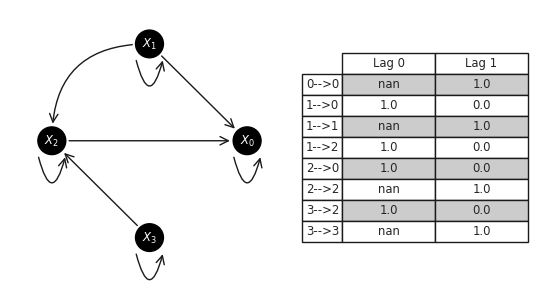

In [19]:
G = tsGraph(4,1, p_auto=1)
G

Graph 140735549954128

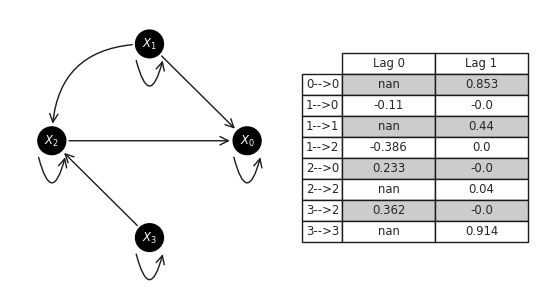

In [20]:
G.gen_coefficients()

TimeSeries 140735550593424

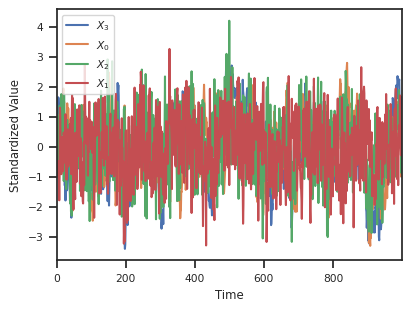

In [21]:
G.gen_data(1000)

In [22]:
G.sortability()

0.6

Graph 140735747443536

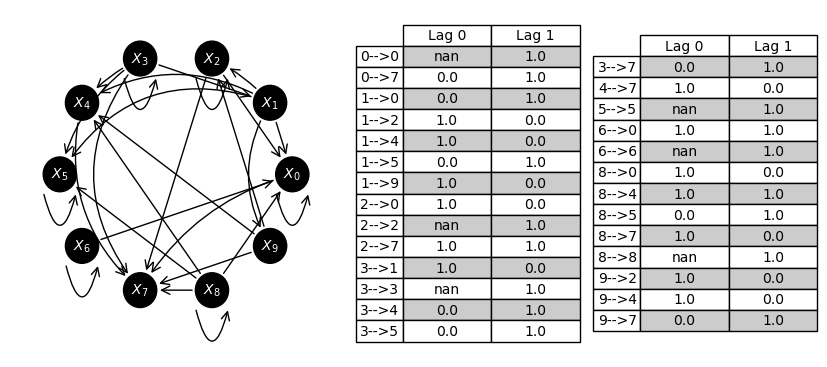

In [2]:
G = tsGraph(10, 1, init_type='no_feedback')
G

Graph 140735747443536

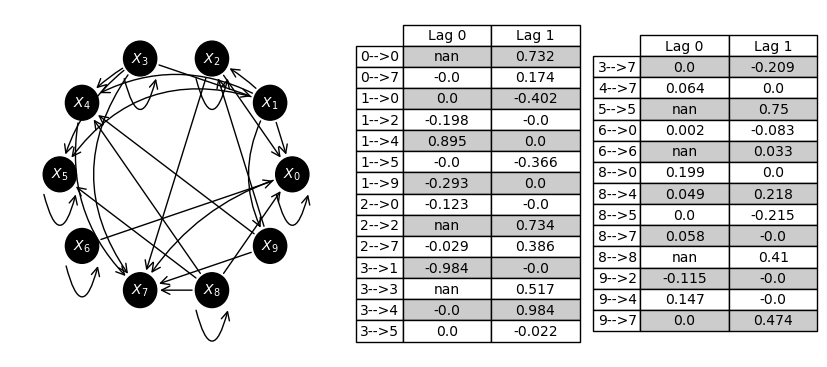

In [3]:
G.gen_coefficients()
G

TimeSeries 140735569176080

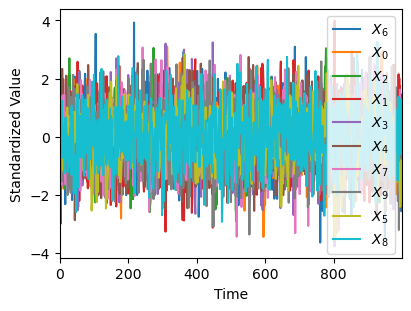

In [4]:
G.gen_data()

In [5]:
G.data.var()

array([[1.03695306],
       [1.02033302],
       [1.0226115 ],
       [1.01122877],
       [0.99633947],
       [0.91541609],
       [1.04643813],
       [0.96690313],
       [0.88560026],
       [0.95504555]])

In [8]:
G.sortability()

0.5185185185185185

In [9]:
G.sortability('R2_summary')

0.4074074074074074